# Exploratory Data Analysis -- a.k.a, hoping my data isn't 'corked'
Now that I have my dataset, I want to explore it and better understand its attributes before beginning the modeling and prediction phase of the project. 

In [1]:
#Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns
%matplotlib inline
plt.rcParams["patch.force_edgecolor"] = True

In [2]:
#read in dataset
cab_df = pd.read_csv('./cablist.csv')

### The Basics 
Let's start by using the info, head, tail and describe methods to understand our datatypes, quickly inspect the data and get a sense of the distribution of some of the numerical attributes.

In [3]:
cab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2770 entries, 0 to 2769
Data columns (total 10 columns):
Id             2770 non-null int64
Attributes     2770 non-null object
Name           2770 non-null object
Vintage        2770 non-null int64
Appellation    2770 non-null object
Region         2770 non-null object
WineType       2770 non-null object
Vineyard       2770 non-null object
RatingScore    2770 non-null int64
PriceRetail    2770 non-null float64
dtypes: float64(1), int64(3), object(6)
memory usage: 216.5+ KB


In [4]:
cab_df.head()

,Id,Attributes,Name,Vintage,Appellation,Region,WineType,Vineyard,RatingScore,PriceRetail
0,140247,Big &amp; Bold,Screaming Eagle Cabernet Sauvignon 2012,2012,Napa Valley,California,Cabernet Sauvignon,Screaming Eagle,100,2499.0
1,147150,Collectible Wines,Penfolds Kalimna Block 42 Cabernet Sauvignon 2004,2004,Barossa Valley,Australia,Cabernet Sauvignon,Penfolds Wines,100,739.0
2,82919,Collectible Wines,Quilceda Creek Cabernet Sauvignon 2002,2002,Columbia Valley,Washington,Cabernet Sauvignon,Quilceda Creek Vintners,100,269.0
3,139436,Big &amp; Bold,Schrader Old Sparky Cabernet Sauvignon (1.5 Li...,2005,Napa Valley,California,Cabernet Sauvignon,Schrader Cellars,100,1349.0
4,87182,Collectible Wines,Quilceda Creek Cabernet Sauvignon 2003,2003,Columbia Valley,Washington,Cabernet Sauvignon,Quilceda Creek Vintners,100,289.0


In [5]:
cab_df.tail()

,Id,Attributes,Name,Vintage,Appellation,Region,WineType,Vineyard,RatingScore,PriceRetail
2765,102160,Big &amp; Bold,Rudd Crossroads Cabernet Sauvignon 2006,2006,Napa Valley,California,Cabernet Sauvignon,Rudd,89,65.00
2766,104641,Smooth &amp; Supple,Freemark Abbey Cabernet Sauvignon 2005,2005,Napa Valley,California,Cabernet Sauvignon,Freemark Abbey,89,41.99
2767,101913,Big &amp; Bold,Martin Ray Napa Cabernet Sauvignon 2006,2006,Napa Valley,California,Cabernet Sauvignon,Martin Ray,89,19.99
2768,28955,Green Wines,d'Arenberg High Trellis Cabernet Sauvignon 1998,1998,McLaren Vale,Australia,Cabernet Sauvignon,d'Arenberg,89,15.99
2769,127720,Green Wines,Long Meadow Ranch Cabernet Sauvignon 1996,1996,Napa Valley,California,Cabernet Sauvignon,Long Meadow Ranch,89,57.99


In [6]:
cab_df.describe()

,Id,Vintage,RatingScore,PriceRetail
count,2770.000000,2770.000000,2770.000000,2770.000000
mean,112546.000722,2005.767148,93.058123,135.094065
std,25897.287147,5.286682,3.066592,252.947503
min,316.000000,1978.000000,0.000000,7.990000
25%,103055.250000,2004.000000,91.000000,41.990000
50%,117722.000000,2007.000000,93.000000,77.990000
75%,129950.000000,2009.000000,95.000000,139.000000
max,148089.000000,2014.000000,100.000000,6000.000000


### Feature Engineering: Creating a Varietal with the Text in the Label

In addition to the rich set of features already available in the dataset, I want to create a variable based on the text of the label. The trick here is to make sure that the information in my new variable is not already present in other existing variables. For example, the 'Name' field is inclusive of the vintage, producer (Vineyard), wine type, and appelation. I want to strip these items out as they are duplicative and do not convey any new information for my modeling. 

I want to analyze the text that is leftover and look for special words that may be used to market a wine at a higher price. Words such as 'reserve' or 'estate' would be examples of this. I am going to look for the most common unique words across all of the labels in the dataset and identify which wines have them. I am not going to use TF-IDF for this exercise as I am only interested in the Term Frequency part of TF-IDF. I'm already working with such a restricted corpus, that computing IDF seems like it introduces additional complexity with potential benefit limited to only a handful of wines. 

In [7]:
#First step: combine all text fields into a single list
wine_names = cab_df['Name'].tolist()
appellation = cab_df['Appellation'].tolist()
wine_type = cab_df['WineType'].tolist()
vineyard = cab_df['Vineyard'].tolist()
vintage = cab_df['Vintage'].tolist()


cabs = zip(wine_names, appellation, wine_type, vineyard, vintage)
cabs[67]

('Robert Mondavi Reserve Cabernet Sauvignon 2010',
 'Napa Valley',
 'Cabernet Sauvignon',
 'Robert Mondavi Winery',
 2010)

In [8]:
#Create a list of lists by splitting each text field into individual words for comparison
words = [[w[0].split(), w[1].split(), w[2].split(), w[3].split()] for w in cabs]
words[67]

[['Robert', 'Mondavi', 'Reserve', 'Cabernet', 'Sauvignon', '2010'],
 ['Napa', 'Valley'],
 ['Cabernet', 'Sauvignon'],
 ['Robert', 'Mondavi', 'Winery']]

In [9]:
#Create list of unique words in label text, excluding vineyard, appellation, vintage and wine type
unq_words = []
for i in words:
    i[0].pop()
    label = i[0]
    appellation = i[1]
    wine_type = i[2]
    vineyard = i[3]
    pass1 = list(set(label)-set(appellation)-set(wine_type)-set(vineyard))
    unq_words.append(pass1)
    
unq_words[67]

['Reserve']

In [10]:
#Let's get the most frequent words
wordcount={}

for l in unq_words:
    for w in l:
        if w not in wordcount:
            wordcount[w] = 1
        else:
            wordcount[w] += 1



In [11]:
#Vineyard is the top word, but I'm making an executive decision to omit this because it doesn't add much value
wordcount_df = pd.DataFrame(wordcount.items(), columns=['Word', 'WordCount'])
wordcount_df = wordcount_df.sort_values('WordCount', ascending=False)
wordcount_df.head(6)

,Word,WordCount
339,Vineyard,294
280,Reserve,255
223,Magnum),173
575,Estate,166
362,(1.5,131
307,Liter,125


In [12]:
unq_w = wordcount_df['Word'][1:6].tolist()
unq_w

['Reserve', 'Magnum)', 'Estate', '(1.5', 'Liter']

In [13]:
#Create list of words in each label
label_words = cab_df['Name'].str.split(' ').tolist()
label_words[67]

['Robert', 'Mondavi', 'Reserve', 'Cabernet', 'Sauvignon', '2010']

In [14]:
#Because I needed to loop through each word on the label for each label in the data, I construced nested loops
words=[]
for l in label_words:
    counter = 0
    for w in l:
        if w in unq_w:
            counter +=1
    if counter > 0:
        words.append(1)
    else:
        words.append(0)
        
            
len(words)

2770

In [15]:
#Create words dataframe for merging with baseline data
words_df = pd.DataFrame(words)
words_df.columns = ['UnqWordInd']
words_df.head()

,UnqWordInd
0,0
1,0
2,0
3,1
4,0


In [16]:
#Merge dataframes
cab_df2 = pd.concat([cab_df, words_df], axis=1)
cab_df2.head()

,Id,Attributes,Name,Vintage,Appellation,Region,WineType,Vineyard,RatingScore,PriceRetail,UnqWordInd
0,140247,Big &amp; Bold,Screaming Eagle Cabernet Sauvignon 2012,2012,Napa Valley,California,Cabernet Sauvignon,Screaming Eagle,100,2499.0,0
1,147150,Collectible Wines,Penfolds Kalimna Block 42 Cabernet Sauvignon 2004,2004,Barossa Valley,Australia,Cabernet Sauvignon,Penfolds Wines,100,739.0,0
2,82919,Collectible Wines,Quilceda Creek Cabernet Sauvignon 2002,2002,Columbia Valley,Washington,Cabernet Sauvignon,Quilceda Creek Vintners,100,269.0,0
3,139436,Big &amp; Bold,Schrader Old Sparky Cabernet Sauvignon (1.5 Li...,2005,Napa Valley,California,Cabernet Sauvignon,Schrader Cellars,100,1349.0,1
4,87182,Collectible Wines,Quilceda Creek Cabernet Sauvignon 2003,2003,Columbia Valley,Washington,Cabernet Sauvignon,Quilceda Creek Vintners,100,289.0,0


In [17]:
#Checking the length of the new dataframe -- all is good!
len(cab_df2)

2770

### Distributions
Let's start by exploring price, as that is the variable I'm interested in predicting. As seen in the results of the describe method, it has a wide distribution, and we can see this visually with the histogram and KDE plots. I'm going to need to drop some of these outliers so that they don't skew the models.  

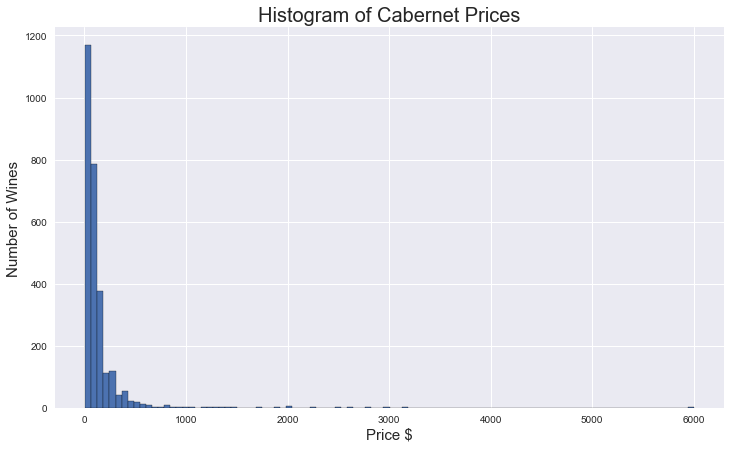

In [18]:
fig, ax = plt.subplots(figsize=(12,7))
cab_df['PriceRetail'].plot.hist(bins=100)
plt.xlabel('Price $', fontsize=15)
plt.ylabel('Number of Wines', fontsize=15)
plt.title('Histogram of Cabernet Prices', fontsize=20)

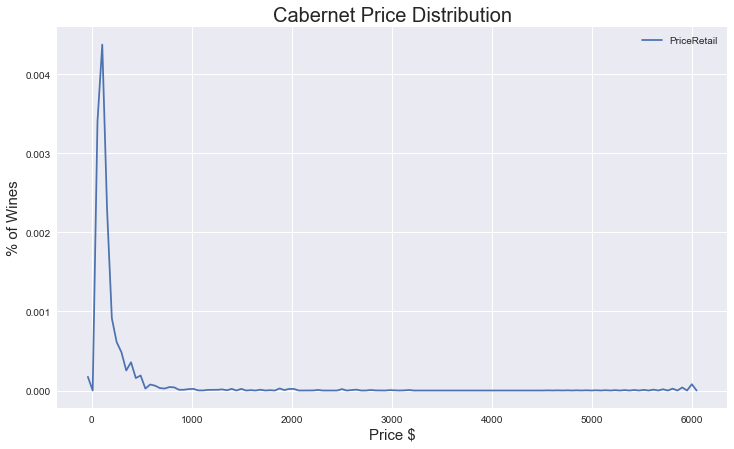

In [19]:
fig, ax = plt.subplots(figsize=(12,7))
sns.kdeplot(cab_df.PriceRetail)
plt.title('Cabernet Price Distribution', fontsize=20)
plt.xlabel('Price $', fontsize=15)
plt.ylabel('% of Wines', fontsize=15)

### Making the cut
Based on the plots above, it seems like a good idea to restrict the dataset only to wines with price < $1000. As shown below, this results in us dropping 30 records out of the original 2770. 

In [20]:
cab_df2 = cab_df2[cab_df2['PriceRetail']<1000]
cab_df2.head()

,Id,Attributes,Name,Vintage,Appellation,Region,WineType,Vineyard,RatingScore,PriceRetail,UnqWordInd
1,147150,Collectible Wines,Penfolds Kalimna Block 42 Cabernet Sauvignon 2004,2004,Barossa Valley,Australia,Cabernet Sauvignon,Penfolds Wines,100,739.0,0
2,82919,Collectible Wines,Quilceda Creek Cabernet Sauvignon 2002,2002,Columbia Valley,Washington,Cabernet Sauvignon,Quilceda Creek Vintners,100,269.0,0
4,87182,Collectible Wines,Quilceda Creek Cabernet Sauvignon 2003,2003,Columbia Valley,Washington,Cabernet Sauvignon,Quilceda Creek Vintners,100,289.0,0
5,137427,Big &amp; Bold,Schrader CCS Beckstoffer To Kalon Cabernet Sau...,2012,Napa Valley,California,Cabernet Sauvignon,Schrader Cellars,100,665.0,0
6,114359,Collectible Wines,Quilceda Creek Cabernet Sauvignon (1.5 Liter M...,2007,Columbia Valley,Washington,Cabernet Sauvignon,Quilceda Creek Vintners,100,599.0,1


In [21]:
print "Number of records in original dataset: "+str(len(cab_df))
print "Number of records in restricted dataset: "+str(len(cab_df2))
print "Number of records dropped: "+str(len(cab_df)-len(cab_df2))

Number of records in original dataset: 2770
Number of records in restricted dataset: 2740
Number of records dropped: 30


In [22]:
cab_df2.describe()

,Id,Vintage,RatingScore,PriceRetail,UnqWordInd
count,2740.000000,2740.000000,2740.000000,2740.000000,2740.000000
mean,112390.384307,2005.776277,93.006934,114.273927,0.217883
std,25960.558042,5.290739,3.035561,123.203760,0.412883
min,316.000000,1978.000000,0.000000,7.990000,0.000000
25%,102965.500000,2004.000000,91.000000,41.990000,0.000000
50%,117419.000000,2007.000000,93.000000,76.990000,0.000000
75%,129743.250000,2009.000000,95.000000,135.000000,0.000000
max,148089.000000,2014.000000,100.000000,999.000000,1.000000


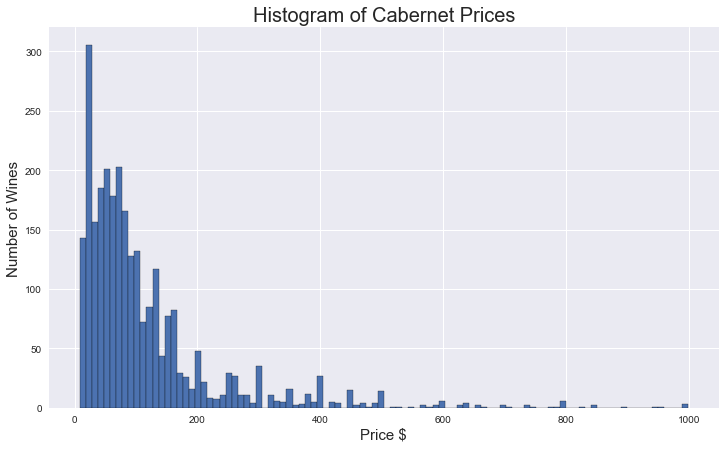

In [23]:
fig, ax = plt.subplots(figsize=(12,7))
cab_df2['PriceRetail'].plot.hist(bins=100)
plt.xlabel('Price $', fontsize=15)
plt.ylabel('Number of Wines', fontsize=15)
plt.title('Histogram of Cabernet Prices', fontsize=20)

### Where in the world? 
Now that we have a decent dataset, let's explore further and take a look at our wines by region. Based on the data, the bulk of our wines are from California, so my hunch is that this variable won't add much in the way of predictive power. Wine.com is a California based company, so it's not surprising to see so much of their invetory from California. 

In [24]:
region = pd.DataFrame(cab_df2.groupby(['Region'])['PriceRetail'].mean())
region.columns = ['AvgPrice']

region2 = pd.DataFrame(cab_df2['Region'].value_counts())
region2.columns=['Wine Count']

region_df = pd.concat([region, region2], axis=1)
region_df

,AvgPrice,Wine Count
Australia,49.083652,230
California,133.401256,2054
Israel,24.240000,4
Italy,38.646667,15
South Africa,32.444762,21
South America,27.956176,204
Spain,60.995000,10
Washington,99.723416,202


/Users/gregorybronn/anaconda/lib/python2.7/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


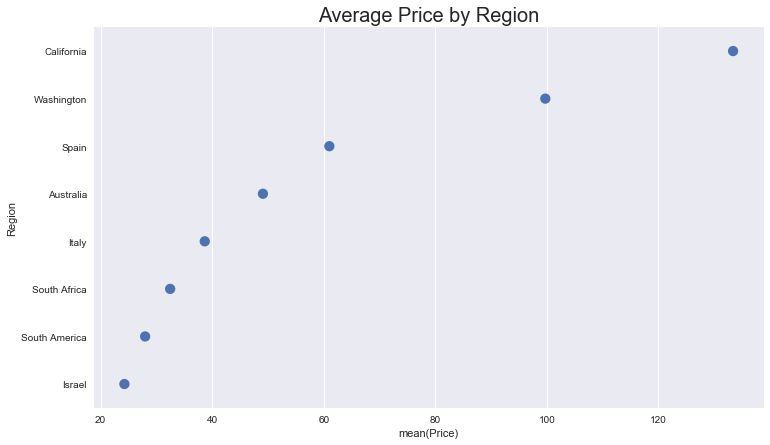

In [25]:
region_df = region_df.reset_index().sort_values('AvgPrice', ascending=False)
region_df.columns=['Region', 'Price', 'WineCount']

fig, ax = plt.subplots(figsize=(12,7))
sns.pointplot(x='Price', y='Region', data=region_df, join=False, ci=None)
plt.title('Average Price by Region', fontsize=20)

### The ratings are...
Do ratings correspond with higher prices in our dataset? Let's take a closer look.

In [26]:
rs = pd.DataFrame(cab_df2.groupby(['RatingScore'])['PriceRetail'].mean())
rs.columns = ['AvgPrice']

rs2 = pd.DataFrame(cab_df2['RatingScore'].value_counts())
rs2.columns=['Wine Count']

rs_df = pd.concat([rs, rs2], axis=1)
rs_df

,AvgPrice,Wine Count
0,63.990000,1
89,25.216161,112
90,46.521226,522
91,95.545000,82
92,79.113585,477
93,95.847599,404
94,111.435379,383
95,157.682760,337
96,184.997551,196
97,227.095543,92


Looks like we have a single outlier where there was no rating, so I'm going to remove it from the dataset.

In [27]:
cab_df2 = cab_df2[cab_df2['RatingScore']!=0]

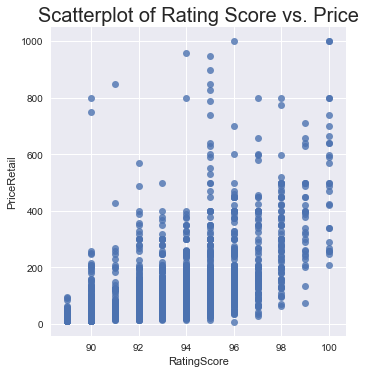

In [28]:
sns.lmplot('RatingScore', 'PriceRetail', data=cab_df2, fit_reg=False)
plt.title('Scatterplot of Rating Score vs. Price', fontsize=20)

/Users/gregorybronn/anaconda/lib/python2.7/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


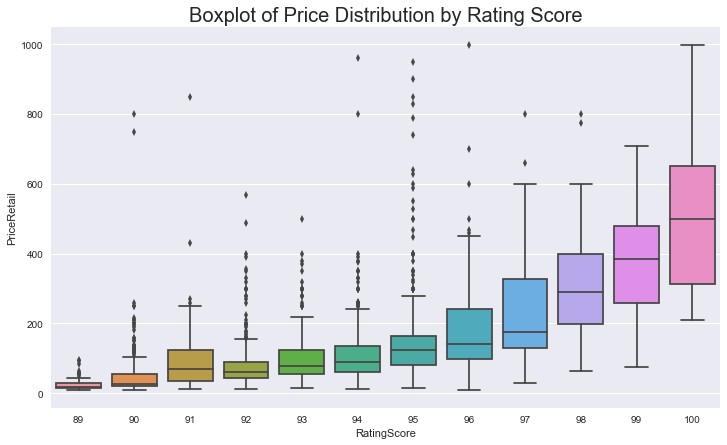

In [29]:
fig, ax = plt.subplots(figsize=(12,7))
plt.title('Boxplot of Price Distribution by Rating Score', fontsize=20)
sns.boxplot(x=cab_df2['RatingScore'], y=cab_df2['PriceRetail'])

### Vintage
Let's explore how price varies by vintage. Do we see higher prices for older vintages?

In [30]:
vint = pd.DataFrame(cab_df2.groupby(['Vintage'])['PriceRetail'].mean())
vint.columns = ['AvgPrice']

vint2 = pd.DataFrame(cab_df2['Vintage'].value_counts())
vint2.columns=['Wine Count']

vint_df = pd.concat([vint, vint2], axis=1)
vint_df

,AvgPrice,Wine Count
1978,172.000000,2
1982,129.000000,1
1984,225.666667,3
1985,379.495000,2
1986,133.664444,9
1987,228.571429,7
1988,127.000000,2
1989,151.198000,5
1990,143.165000,6
1991,160.076154,13


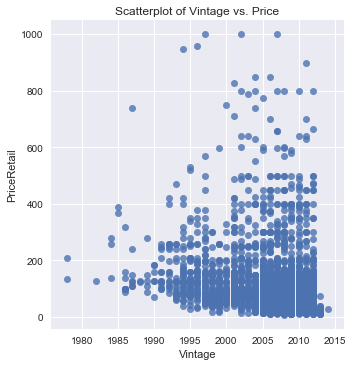

In [31]:
sns.lmplot('Vintage', 'PriceRetail', data=cab_df2, fit_reg=False)
plt.title('Scatterplot of Vintage vs. Price')

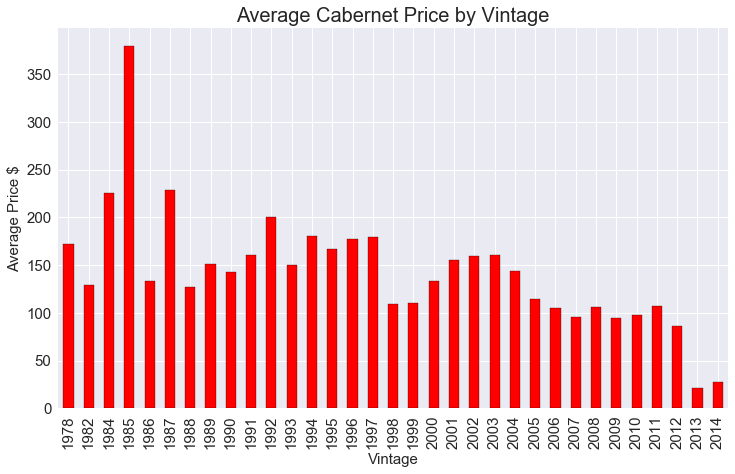

In [32]:
fig, ax = plt.subplots(figsize=(12,7))
vint_df['AvgPrice'].plot.bar(color='r')
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
plt.xlabel('Vintage', fontsize=15)
plt.ylabel('Average Price $', fontsize=15)
plt.title('Average Cabernet Price by Vintage', fontsize=20)

### Let's look at at the attributes
Do the advertised attributes from Wine.com correspond with higher prices? Let's take a closer look.

In [33]:
att = pd.DataFrame(cab_df2.groupby(['Attributes'])['PriceRetail'].mean())
att.columns = ['AvgPrice']

att2 = pd.DataFrame(cab_df2['Attributes'].value_counts())
att2.columns=['Wine Count']

att_df = pd.concat([att, att2], axis=1)
att_df

,AvgPrice,Wine Count
90+ Rated Wine,48.000000,1
94+ Rated Wine,99.990000,1
Big &amp; Bold,99.010364,1155
Boutique Wines,172.635538,130
Business Gifts,114.500000,2
Collectible Wines,161.733750,928
Earthy &amp; Spicy,35.868361,61
Great Bottles to Give,179.990000,2
Green Wines,48.919130,46
Kosher Wines,61.740000,4


In [34]:
unqWord = pd.DataFrame(cab_df2.groupby(['UnqWordInd'])['PriceRetail'].mean())
unqWord.columns = ['AvgPrice']

unqWord2 = pd.DataFrame(cab_df2['UnqWordInd'].value_counts())
unqWord2.columns=['Wine Count']

unqWord_df = pd.concat([unqWord, unqWord2], axis=1)
unqWord_df

,AvgPrice,Wine Count
UnqWordInd,,
0,104.043770,2143
1,151.142232,596


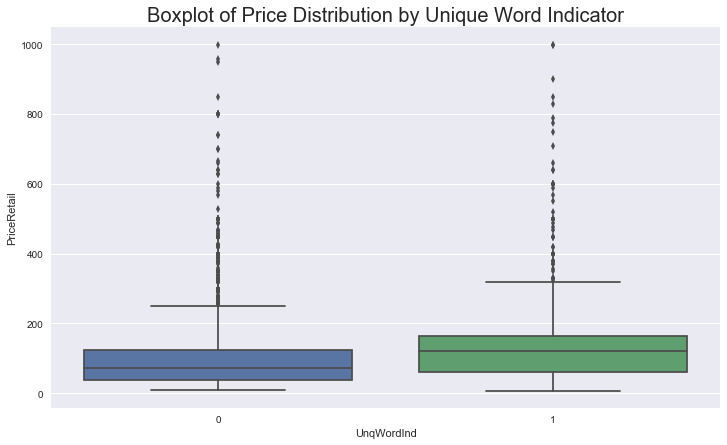

In [35]:
fig, ax = plt.subplots(figsize=(12,7))
plt.title('Boxplot of Price Distribution by Unique Word Indicator', fontsize=20)
sns.boxplot(x=cab_df2['UnqWordInd'], y=cab_df2['PriceRetail'])

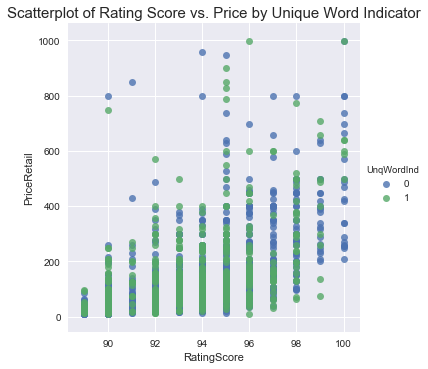

In [40]:
sns.lmplot('RatingScore', 'PriceRetail', data=cab_df2, fit_reg=False, hue='UnqWordInd')
plt.title('Scatterplot of Rating Score vs. Price by Unique Word Indicator', fontsize=15)

## ----------------------------------------Findings So Far------------------------------------------------

At this point, I've got a good sense of the data that I'm working with. A few things that struck me as interesting and worthy of consideration as I move into modeling are:

*1. Vintage doesn't seem to provide good price discrimination. Older wines don't appear to be consistenly higher priced on average vs. newer wines, with the exception of 2013-2014.* 

*2. Rating Score does seem to do a good job of indicating higher average price. Wines with higher ratings tend to have higher prices, on average.* 

*3. Wines from California seem to have higher average prices vs. other parts of the world. However, most of the inventory is from California, so I'll need to keep this in mind as I move into the modeling phase.* 

*4. The "Collectible Wines" attribute may be a good predictor given its higher average price vs. other attributes.*

*5. Distribution appears normal and is not lumpy or thin. *

*6. The 'Unique Word Indicator' appears to do a good job of signaling higher prices among wines. However, it seems to be used less frequently among higher rated wines. Perhaps lower rated wines use these words to position themselves as worthy of a higher price in lieu of lower ratings. *

In [43]:
#create dummy variables for attributes variable
attribute_dummies = pd.get_dummies(cab_df2.Attributes, prefix='Attribute').ix[:, 1:]
region_dummies = pd.get_dummies(cab_df2.Region, prefix='Region').ix[:, 1:]

/Users/gregorybronn/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app
/Users/gregorybronn/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  app.launch_new_instance()


In [45]:
#Merge dummies with existing dataframe
cab_df2 = pd.concat([cab_df2, attribute_dummies], axis=1)
cab_df2 = pd.concat([cab_df2, region_dummies], axis=1)
cab_df2.head()

,Id,Attributes,Name,Vintage,Appellation,Region,WineType,Vineyard,RatingScore,PriceRetail,...,Attribute_Rich &amp; Creamy,Attribute_Screw Cap Wines,Attribute_Smooth &amp; Supple,Region_California,Region_Israel,Region_Italy,Region_South Africa,Region_South America,Region_Spain,Region_Washington
1,147150,Collectible Wines,Penfolds Kalimna Block 42 Cabernet Sauvignon 2004,2004,Barossa Valley,Australia,Cabernet Sauvignon,Penfolds Wines,100,739.0,...,0,0,0,0,0,0,0,0,0,0
2,82919,Collectible Wines,Quilceda Creek Cabernet Sauvignon 2002,2002,Columbia Valley,Washington,Cabernet Sauvignon,Quilceda Creek Vintners,100,269.0,...,0,0,0,0,0,0,0,0,0,1
4,87182,Collectible Wines,Quilceda Creek Cabernet Sauvignon 2003,2003,Columbia Valley,Washington,Cabernet Sauvignon,Quilceda Creek Vintners,100,289.0,...,0,0,0,0,0,0,0,0,0,1
5,137427,Big &amp; Bold,Schrader CCS Beckstoffer To Kalon Cabernet Sau...,2012,Napa Valley,California,Cabernet Sauvignon,Schrader Cellars,100,665.0,...,0,0,0,1,0,0,0,0,0,0
6,114359,Collectible Wines,Quilceda Creek Cabernet Sauvignon (1.5 Liter M...,2007,Columbia Valley,Washington,Cabernet Sauvignon,Quilceda Creek Vintners,100,599.0,...,0,0,0,0,0,0,0,0,0,1


### Have a drink! Time to move on to the modeling

In [46]:
#Export list to csv for backup- it took me awhile to get to this point!
cab_df2.to_csv('cablist4.csv', index=False, header=True)